In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers_table_raw = pd.read_csv('data/dataset.csv')
customers_table_raw

,years-customer-register,avg-clicks-per-session,time-spent-on-app,time-spent-on-website,total-amount-spent
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075
...,...,...,...,...,...
495,1.820811,34.606242,11.761884,38.126520,402.167122
496,4.183144,34.238242,11.550300,35.769330,551.023002
497,3.393903,32.047815,12.482670,35.536025,497.389558
498,4.426364,30.971676,11.731364,36.074551,494.638610


For the sake of clarity, I'll adjust the time columns names, so it indicates the time unit.

In [3]:
customers_table = customers_table_raw.copy()
customers_table.columns = ['years-customer-register', 'avg-clicks-per-session', 'minutes-spent-on-app', 'minutes-spent-on-website', 'total-amount-spent']

In [4]:
customers_table

,years-customer-register,avg-clicks-per-session,minutes-spent-on-app,minutes-spent-on-website,total-amount-spent
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075
...,...,...,...,...,...
495,1.820811,34.606242,11.761884,38.126520,402.167122
496,4.183144,34.238242,11.550300,35.769330,551.023002
497,3.393903,32.047815,12.482670,35.536025,497.389558
498,4.426364,30.971676,11.731364,36.074551,494.638610


In [5]:
customers_table.describe()

,years-customer-register,avg-clicks-per-session,minutes-spent-on-app,minutes-spent-on-website,total-amount-spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.533462,33.053194,12.052488,37.060445,499.314038
std,0.999278,0.992563,0.994216,1.010489,79.314782
min,0.269901,29.532429,8.508152,33.913847,256.670582
25%,2.930450,32.341822,11.388153,36.349257,445.038277
50%,3.533975,33.082008,11.983231,37.069367,498.887875
75%,4.126502,33.711985,12.753850,37.716432,549.313828
max,6.922689,36.139662,15.126994,40.005182,765.518462


In [6]:
customers_table.isnull().values.any()

False

---

### Exploratory Analysis

Here will do simple data analysis, just so we can capture some patterns within the data.

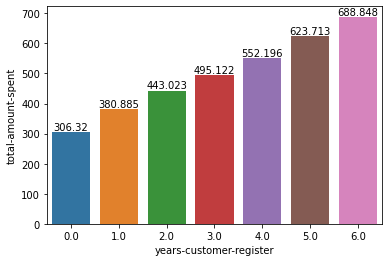

In [51]:
spending_by_years_registered = customers_table[['years-customer-register', 'total-amount-spent']].copy()
spending_by_years_registered.loc[:,'years-customer-register'] = spending_by_years_registered.loc[:,'years-customer-register'].apply(np.floor)
spending_by_years_registered = spending_by_years_registered.groupby('years-customer-register').mean().reset_index()

ax = sns.barplot(data=spending_by_years_registered, x='years-customer-register', y='total-amount-spent')
ax = ax.bar_label(ax.containers[0])